# **Project Name**    - Local Food Wastage Management System

##### **Project Type**    - EDA + Database Management
##### **Contribution**    - Individual

# **Project Summary -**

Food wastage is a major global challenge, with households and restaurants discarding large amounts of surplus food while many individuals face food insecurity. This project focuses on building a **Local Food Wastage Management System** that bridges the gap between food providers (restaurants, grocery stores, supermarkets, individuals) and receivers (NGOs, community centers, individuals).

The system integrates **SQL for data storage and analysis, Python for processing, and a Streamlit application for user interaction**. The platform will allow providers to list surplus food, and receivers to claim food based on filters such as city, food type, and meal type.

Key features include:

- CRUD operations for managing food listings and claims.

- SQL-powered insights into provider contributions, claims distribution, and food wastage trends.

- Interactive Streamlit interface for visualization, search, and provider–receiver coordination.

- Analysis of demand and wastage trends to support sustainable food management practices.

Ultimately, this project contributes to **waste reduction** and **social good**, promoting better food redistribution and community impact.

# **GitHub Link -**

https://github.com/Vignesha-S/Food-Waste-Management

# **Problem Statement**


Food wastage persists as a critical issue despite increasing hunger and food insecurity. The absence of structured redistribution channels between food providers and needy communities results in inefficiency. This project aims to develop a **data-driven local food wastage management system** that:

- Connects food providers and receivers through a digital platform.

- Enables efficient listing, filtering, and claiming of surplus food.

- Uses SQL to track, analyze, and visualize donation and claim patterns.

- Provides actionable insights to reduce wastage and improve redistribution.

# 1. Data Preparation

### Import Libraries

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

### Load Datasets

In [2]:
providers_df = pd.read_csv('data/providers_data.csv')
receivers_df = pd.read_csv('data/receivers_data.csv')
food_listings_df = pd.read_csv('data/food_listings_data.csv')
claims_df = pd.read_csv('data/claims_data.csv')

# Preview first rows
print("Providers:\n", providers_df.head())
print("Recievers:\n", receivers_df.head())
print("Food Listings:\n", food_listings_df.head())
print("Claims:\n", claims_df.head())

Providers:
    Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   
3            4   Clark, Prince and Williams  Grocery Store   
4            5               Coleman-Farley  Grocery Store   

                                             Address            City  \
0  74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1           91228 Hanson Stream\nWelchtown, OR 27136     East Sheena   
2  561 Martinez Point Suite 507\nGuzmanchester, W...  Lake Jesusview   
3     467 Bell Trail Suite 409\nPort Jesus, IA 61188     Mendezmouth   
4  078 Matthew Creek Apt. 319\nSaraborough, MA 53978   Valentineside   

                Contact  
0       +1-600-220-0480  
1  +1-925-283-8901x6297  
2      001-517-295-2206  
3      556.944.8935x401  
4          193.714.6577  
Recievers:
    Receiver_ID

### Check Shape of the data

In [3]:
print("Providers Shape:", providers_df.shape)
print("Receivers Shape:", receivers_df.shape)
print("Food Listings Shape:", food_listings_df.shape)
print("Claims Shape:", claims_df.shape)

Providers Shape: (1000, 6)
Receivers Shape: (1000, 5)
Food Listings Shape: (1000, 9)
Claims Shape: (1000, 5)


### Check basic info

In [4]:
print("\nProviders Info:")
print(providers_df.info())
print("\nReceivers Info:")
print(receivers_df.info())
print("\nFood Listings Info:")
print(food_listings_df.info())
print("\nClaims Info:")
print(claims_df.info())


Providers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None

Receivers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Receiver_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   City         1000 non-null   object
 4   Contact      1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None

Food Listings Info:
<class '

### Check Missing values

In [5]:
print("\nMissing values:")
print("Providers:\n", providers_df.isnull().sum())
print("Receivers:\n", receivers_df.isnull().sum())
print("Food Listings:\n", food_listings_df.isnull().sum())
print("Claims:\n", claims_df.isnull().sum())


Missing values:
Providers:
 Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64
Receivers:
 Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64
Food Listings:
 Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64
Claims:
 Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64


### Convert date columns to datetime

In [6]:
# Convert date columns to datetime
food_listings_df['Expiry_Date'] = pd.to_datetime(food_listings_df['Expiry_Date'], errors='coerce')
# Normalize separators (replace - with /)
claims_df["Timestamp"] = claims_df["Timestamp"].astype(str).str.replace("-", "/")

# Convert to datetime (month first)
claims_df["Timestamp"] = pd.to_datetime(
    claims_df["Timestamp"], 
    format="%m/%d/%Y %H:%M",
    errors="coerce"
)

# Verify conversion
print("Food Listings after conversion:\n")
print(food_listings_df.info())

print("\nClaims after conversion:\n")
print(claims_df.info())

Food Listings after conversion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Food_ID        1000 non-null   int64         
 1   Food_Name      1000 non-null   object        
 2   Quantity       1000 non-null   int64         
 3   Expiry_Date    1000 non-null   datetime64[ns]
 4   Provider_ID    1000 non-null   int64         
 5   Provider_Type  1000 non-null   object        
 6   Location       1000 non-null   object        
 7   Food_Type      1000 non-null   object        
 8   Meal_Type      1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 70.4+ KB
None

Claims after conversion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----      

- Loaded the datasets: **Providers, Receivers, Food Listings, and Claims**.  
- Checked for missing values and verified dataset consistency.  
- Ensured correct data types:  
  - Converted `Expiry_Date` in *Food Listings* to `datetime`.  
  - Normalized separators (`-` → `/`) in *Claims* and converted `Timestamp` to `datetime`.  
- Verified successful conversion with **no missing values** in date columns.  

**The datasets are now clean, consistent, and ready for database creation.**  

# 2. Database Creation

### Connect to SQLite database

In [7]:
conn = sqlite3.connect("food_donation.db")
cursor = conn.cursor()

# Create tables
cursor.execute('''
CREATE TABLE Providers (
    Provider_ID   INTEGER PRIMARY KEY,
    Name          TEXT,
    Type          TEXT,
    Address       TEXT,
    City          TEXT,
    Contact       TEXT
)
''')

cursor.execute('''
CREATE TABLE Receivers (
    Receiver_ID   INTEGER PRIMARY KEY,
    Name          TEXT,
    Type          TEXT,
    City          TEXT,
    Contact       TEXT
)
''')

cursor.execute('''
CREATE TABLE Food_Listings (
    Food_ID       INTEGER PRIMARY KEY,
    Food_Name     TEXT,
    Quantity      INTEGER,
    Expiry_Date   DATETIME,
    Provider_ID   INTEGER,
    Provider_Type TEXT,
    Location      TEXT,
    Food_Type     TEXT,
    Meal_Type     TEXT,
    FOREIGN KEY (Provider_ID) REFERENCES Providers (Provider_ID)
)
''')

cursor.execute('''
CREATE TABLE Claims (
    Claim_ID      INTEGER PRIMARY KEY,
    Food_ID       INTEGER,
    Receiver_ID   INTEGER,
    Status        TEXT,
    Timestamp     DATETIME,
    FOREIGN KEY (Food_ID) REFERENCES Food_Listings (Food_ID),
    FOREIGN KEY (Receiver_ID) REFERENCES Receivers (Receiver_ID)
)
''')

conn.commit()
print('Tables created successfully')

Tables created successfully


In [8]:
# Insert data into tables from DataFrames
providers_df.to_sql("Providers", conn, if_exists="append", index=False)
receivers_df.to_sql("Receivers", conn, if_exists="append", index=False)
food_listings_df.to_sql("Food_Listings", conn, if_exists="append", index=False)
claims_df.to_sql("Claims", conn, if_exists="append", index=False)

print("Data inserted successfully into all tables!")

Data inserted successfully into all tables!


#### Verify data inserted

In [9]:
for table in ["Providers", "Receivers", "Food_Listings", "Claims"]:
    rows = cursor.execute(f"SELECT COUNT(*) FROM {table}").fetchone()[0]
    print(f"{table}: {rows} records")

Providers: 1000 records
Receivers: 1000 records
Food_Listings: 1000 records
Claims: 1000 records


### Implemement CRUD Operations

In [10]:
# Connect to db
conn = sqlite3.connect("food_donation.db")
cursor = conn.cursor()

# CREATE - Insert a record
def insert_record(table, data):
    placeholders = ", ".join(["?"] * len(data))
    query = f'INSERT INTO {table} VALUES ({placeholders})'
    cursor.execute(query, data)
    conn.commit()
    #print(f"Record inserted into {table}.")

# READ - Fetch all records
def read_records(table, column=None, value=None):
    """
    Read records from a table.
    If column and value are provided, filter results.
    """
    if column and value is not None:
        query = f'SELECT * FROM {table} WHERE {column} = ?'
        cursor.execute(query, (value,))
    else:
        query = f'SELECT * FROM {table}'
        cursor.execute(query)
    return cursor.fetchall()

# UPDATE - Update a record
def update_record(table, column, value, condition_column, condition_value):
    query = f"UPDATE {table} SET {column} = ? WHERE {condition_column} = ?"
    cursor.execute(query, (value, condition_value))
    conn.commit()
    print(f"Record updated in {table}.")

# DELETE - Delete a record
def delete_record(table, condition_column, condition_value):
    query = f"DELETE FROM {table} WHERE {condition_column} = ?"
    cursor.execute(query, (condition_value,))
    conn.commit()
    print(f"Record deleted from {table}.")

In [11]:
# 1. Insert a new test provider (use an ID not in the dataset)
insert_record("Providers", (2001, "Helping Hands", "NGO", "123 Main St", "Chennai", "9876543210"))

# 2. Read the inserted record
print("After Insert:")
print(read_records("Providers", "Provider_ID", 2001))

# 3. Update the test provider's name
update_record("Providers", "Name", "New Helping Hands", "Provider_ID", 2001)

print("After Update:")
print(read_records("Providers", "Provider_ID", 2001))

# 4. Delete the test provider
delete_record("Providers", "Provider_ID", 2001)

print("After Delete:")
print(read_records("Providers", "Provider_ID", 2001))  # should show empty


After Insert:
[(2001, 'Helping Hands', 'NGO', '123 Main St', 'Chennai', '9876543210')]
Record updated in Providers.
After Update:
[(2001, 'New Helping Hands', 'NGO', '123 Main St', 'Chennai', '9876543210')]
Record deleted from Providers.
After Delete:
[]


## Database Creation and Operations  

- Created a SQLite database (`food_donation.db`) to store all records.  
- Defined and created four tables:  
  - **Providers** → stores provider details  
  - **Receivers** → stores receiver details  
  - **Food_Listings** → tracks food items, expiry dates, and provider info  
  - **Claims** → logs claims made by receivers with timestamps  
- Inserted cleaned DataFrames into the database using `pandas.to_sql()`.  
- Verified successful insertion by checking record counts for each table.  

---

### CRUD Operations 
To demonstrate database functionality, we implemented four functions:  
- `insert_record()` → insert new records  
- `read_records()` → fetch existing records  
- `update_record()` → update existing records  
- `delete_record()` → delete records  

#### Safe Test Example (using Provider_ID = 2001)  
This ensures the original dataset remains untouched.  

- **After Insert:**  
  `[(2001, 'Helping Hands', 'NGO', '123 Main St', 'Chennai', '9876543210')]`  

- **After Update:**  
  `[(2001, 'New Helping Hands', 'NGO', '123 Main St', 'Chennai', '9876543210')]`  

- **After Delete:**  
  `[]`  

✅ All CRUD operations executed successfully without affecting the original data.

# 3. Data Analysis

In [12]:
# Function to run any SQL query and return a DataFrame
def run_query(query):
    conn = sqlite3.connect("food_donation.db")  # Connect to your SQLite DB
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

### Food Providers & Receivers

#### Query 1: Count of food providers and receivers in each city

In [29]:
query1 = """
SELECT City, 
       (SELECT COUNT(*) FROM Providers p WHERE p.City = c.City) AS Total_Providers,
       (SELECT COUNT(*) FROM Receivers r WHERE r.City = c.City) AS Total_Receivers
FROM (SELECT City FROM Providers UNION SELECT City FROM Receivers) c
GROUP BY City
ORDER BY City;
"""
result1 = run_query(query1)
print("Query 1 Result:\n", result1)

Query 1 Result:
                 City  Total_Providers  Total_Receivers
0         Aaronshire                0                1
1           Adambury                1                0
2           Adamland                0                1
3          Adamsview                1                0
4         Adamsville                1                0
...              ...              ...              ...
1873       Yatesside                1                0
1874    Youngchester                1                0
1875     Zacharyview                0                1
1876    Zimmermanton                1                0
1877  Zimmermanville                1                0

[1878 rows x 3 columns]


**Insights:**
- Most cities have either a single provider or a single receiver, showing a wide but sparse distribution.
- Some cities have both providers and receivers, while others have only one type, indicating mismatches in supply and demand.
- Highlights cities where additional providers or receivers are needed for better food distribution.


#### Query 2: Type of food provider contributing the most

In [14]:
query2 = """
SELECT Type AS Provider_Type, COUNT(*) AS Total_Contributions
FROM Providers p
JOIN Food_Listings f ON p.Provider_ID = f.Provider_ID
GROUP BY Type
ORDER BY Total_Contributions DESC;
"""
result2 = run_query(query2)
print("\nQuery 2 Result:\n", result2)


Query 2 Result:
       Provider_Type  Total_Contributions
0       Supermarket                  267
1        Restaurant                  258
2     Grocery Store                  243
3  Catering Service                  232


**Insights:**
- Supermarkets are the largest contributors, followed closely by restaurants and grocery stores.
- Catering services also make a significant contribution, showing a balanced mix of food sources.
- Indicates that partnerships with supermarkets and restaurants can maximize food availability.


#### Query 3: Contact info of food providers in a specific city

In [15]:
query3 = """
SELECT Name, Contact
FROM Providers
WHERE City = 'New Jessica';
"""
result3 = run_query(query3)
print("\nQuery 3 Result:\n", result3)


Query 3 Result:
                Name          Contact
0  Gonzales-Cochran  +1-600-220-0480


**Insights:**

* In the city *New Jessica*, there is one food provider, **Gonzales-Cochran**, with contact **+1-600-220-0480**.
* This shows that for smaller cities, direct coordination with a single provider is straightforward.


#### Query 4: Receivers who have claimed the most food

In [16]:
query4 = """
SELECT r.Receiver_ID, COUNT(c.Claim_ID) AS Total_Claims
FROM Receivers r
JOIN Claims c ON r.Receiver_ID = c.Receiver_ID
GROUP BY r.Receiver_ID
ORDER BY Total_Claims DESC;
"""
result4 = run_query(query4)
print("\nQuery 4 Result:\n", result4)


Query 4 Result:
      Receiver_ID  Total_Claims
0            800             5
1            742             5
2            371             5
3            276             5
4            901             4
..           ...           ...
619           15             1
620           12             1
621            7             1
622            3             1
623            2             1

[624 rows x 2 columns]


**Insights:**

* The top receivers (e.g., IDs 800, 742, 371, 276) have claimed **5 food items each**, indicating high engagement.
* Most receivers claim only **1–2 items**, showing that a small group accounts for repeated food claims.
* This helps identify frequent beneficiaries for targeted distribution plannng.


### Food Listings & Availability

#### Query 5: Total quantity of food available from all providers

In [17]:
query5 = """
SELECT SUM(Quantity) AS Total_Food_Quantity
FROM Food_Listings;
"""
result5 = run_query(query5)
print("\nQuery 5 Result:\n", result5)


Query 5 Result:
    Total_Food_Quantity
0                25794


**Insights:**

* The **total quantity of food available** across all providers is **25,794 units**.
* This gives an overview of the overall food supply for distribution plannig.


#### Query 6: City with the highest number of food listings

In [18]:
query6 = """
SELECT p.City, COUNT(f.Food_ID) AS Total_Listings
FROM Food_Listings f
JOIN Providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.City
ORDER BY Total_Listings DESC
LIMIT 1;
"""
result6 = run_query(query6)
print("\nQuery 6 Result:\n", result6)


Query 6 Result:
             City  Total_Listings
0  South Kathryn               6


**Insights:**

* The city with the **highest number of food listings** is **South Kathryn** with **6 listings**.
* This indicates a higher concentration of available food in that city, which could be prioritized for distributin.


#### Query 7: Most commonly available food types

In [19]:
query7 = """
SELECT Food_Type, COUNT(*) AS Total_Listings
FROM Food_Listings
GROUP BY Food_Type
ORDER BY Total_Listings DESC
LIMIT 10;
"""
result7 = run_query(query7)
print("\nQuery 7 Result:\n", result7)


Query 7 Result:
         Food_Type  Total_Listings
0      Vegetarian             336
1           Vegan             334
2  Non-Vegetarian             330


**Insights:**

* The most commonly available food types are **Vegetarian (336 listings)**, **Vegan (334 listings)**, and **Non-Vegetarian (330 listings)**.
* The availability is almost evenly distributed across all major food types, suggesting balanced donation trens.


### Claims & Distribution

#### Query 8: Number of food claims for each food item

In [20]:
query8 = """
SELECT f.Food_Type, COUNT(c.Claim_ID) AS Total_Claims
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
GROUP BY f.Food_Type
ORDER BY Total_Claims DESC;
"""
result8 = run_query(query8)
print("\nQuery 8 Result:\n", result8)


Query 8 Result:
         Food_Type  Total_Claims
0      Vegetarian           350
1  Non-Vegetarian           331
2           Vegan           319


**Insights:**

* **Vegetarian food** has the highest number of claims **(350)**, followed by **Non-Vegetarian (331)** and **Vegan (319)**.
* This indicates that vegetarian items are slightly more in demand among receivers, though all food types are actively claimed.

#### Query 9: Provider with the highest number of successful food claims

In [21]:
query9 = """
SELECT p.Name, COUNT(c.Claim_ID) AS Successful_Claims
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
JOIN Providers p ON f.Provider_ID = p.Provider_ID
WHERE c.Status = 'Completed'
GROUP BY p.Name
ORDER BY Successful_Claims DESC
LIMIT 1;
"""
result9 = run_query(query9)
print("\nQuery 9 Result:\n", result9)


Query 9 Result:
           Name  Successful_Claims
0  Barry Group                  5


**Insights:**

* **Barry Group** has the highest number of successful food claims (5), indicating it is the most active or reliable provider in fulfilling food request.


#### Query 10: Percentage of claims by status

In [22]:
query10 = """
SELECT Status, 
       ROUND(CAST(COUNT(*) AS FLOAT) / (SELECT COUNT(*) FROM Claims) * 100, 2) AS Percentage
FROM Claims
GROUP BY Status;
"""
result10 = run_query(query10)
print("\nQuery 10 Result:\n", result10)


Query 10 Result:
       Status  Percentage
0  Cancelled        33.6
1  Completed        33.9
2    Pending        32.5


**Insights:**

* The food claims are almost evenly distributed across statuses: **Completed (33.9%)**, **Cancelled (33.6%)**, and **Pending (32.5%)**.
* This indicates a need to improve the completion rate and reduce cancellations to optimize food distribution.

### Analysis & Insights

#### Query 11: Average quantity of food claimed per receiver

In [23]:
query11 = """
SELECT r.Receiver_ID, AVG(f.Quantity) AS Avg_Quantity_Claimed
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
JOIN Receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Receiver_ID
ORDER BY Avg_Quantity_Claimed DESC;
"""
result11 = run_query(query11)
print("\nQuery 11 Result:\n", result11)


Query 11 Result:
      Receiver_ID  Avg_Quantity_Claimed
0            982                  50.0
1            739                  50.0
2            616                  50.0
3            567                  50.0
4            429                  50.0
..           ...                   ...
619          214                   2.0
620          184                   2.0
621          174                   2.0
622          904                   1.0
623          765                   1.0

[624 rows x 2 columns]


**Insights:**

* On average, receivers claim varying quantities of food, ranging from **1 to 50 units**.
* Some receivers consistently claim larger amounts, suggesting high demand or frequent usage, while many claim smaller quantities.
* This can help target distribution efforts efficiently by prioritizing high-demand receivers.


#### Query 12: Most claimed meal type

In [24]:
query12 = """
SELECT Meal_Type, COUNT(c.Claim_ID) AS Total_Claims
FROM Claims c
JOIN Food_Listings f ON c.Food_ID = f.Food_ID
GROUP BY Meal_Type
ORDER BY Total_Claims DESC
LIMIT 1;
"""
result12 = run_query(query12)
print("\nQuery 12 Result:\n", result12)


Query 12 Result:
    Meal_Type  Total_Claims
0  Breakfast           278


**Insights:**

* **Breakfast** is the most claimed meal type, with 278 claims.
* This indicates higher demand for breakfast items, which could guide providers to prioritize breakfast food distribution.

#### Query 13: Total quantity of food donated by each provider

In [25]:
query13 = """
SELECT p.Name, SUM(f.Quantity) AS Total_Donated
FROM Food_Listings f
JOIN Providers p ON f.Provider_ID = p.Provider_ID
GROUP BY p.Name
ORDER BY Total_Donated DESC;
"""
result13 = run_query(query13)
print("\nQuery 13 Result:\n", result13)


Query 13 Result:
                                 Name  Total_Donated
0                         Miller Inc            217
1                        Barry Group            179
2         Evans, Wright and Mitchell            158
3                        Smith Group            150
4                       Campbell LLC            145
..                               ...            ...
623                   Reyes and Sons              1
624                  Norris-Townsend              1
625                        Mcgee PLC              1
626  Martinez, Armstrong and Carroll              1
627                   Gonzales-Moore              1

[628 rows x 2 columns]


**Insights:**

* **Miller Inc** is the top food donor with a total of 217 donated items.
* Other major contributors include **Barry Group** and **Evans, Wright and Mitchell**, indicating that a few providers contribute a significant portion of the total food donations.
* Many providers have contributed very little (1–2 items), showing an uneven distribution of donations among providers.

#### Query 14: Top Food Providers by Total Contributions

In [26]:
query_14 = """
SELECT f.Provider_ID, p.Name, COUNT(f.Food_ID) AS Total_Contributions
FROM Food_Listings f
JOIN Providers p ON f.Provider_ID = p.Provider_ID
GROUP BY f.Provider_ID
ORDER BY Total_Contributions DESC
LIMIT 10;
"""
df_14 = pd.read_sql_query(query_14, conn)
print(df_14)

   Provider_ID               Name  Total_Contributions
0          709        Barry Group                    6
1          655        Smith Group                    5
2          563        Daniels-Kim                    5
3          161       Campbell LLC                    5
4          995        Moore Group                    4
5          993       Mckinney Ltd                    4
6          906         Wright LLC                    4
7          846         Miller Inc                    4
8          752  Butler-Richardson                    4
9          678         Ruiz-Oneal                    4


**Insights:**

* **Barry Group** made the most frequent contributions (**6 times**), followed by **Smith Group**, **Daniels-Kim**, and **Campbell LLC** (**5 times each**).
* This shows which providers are most active in donating, regardless of the quantity per donation, which can help in maintaining consistent supply chains.

#### Query 15: Highest Demand Locations Based on Food Claims


In [27]:
query_15 = """
SELECT P.City, COUNT(C.Claim_ID) AS Total_Claims
FROM Claims C
JOIN Food_Listings F ON C.Food_ID = F.Food_ID
JOIN Providers P ON F.Provider_ID = P.Provider_ID
GROUP BY P.City
ORDER BY Total_Claims DESC
LIMIT 10;
"""
df_15 = pd.read_sql_query(query_15, conn)
print(df_15)

               City  Total_Claims
0  East Heatherport            12
1  Lake Andrewmouth             9
2         Jamesfurt             9
3     South Kathryn             7
4         New Carol             7
5         East John             7
6    Timothychester             6
7       Thomasville             6
8      Phillipsfort             6
9    East Stephanie             6


**Insights:**
- East Heatherport has the highest number of food claims (12), followed by Lake Andrewmouth and Jamesfurt (9 each).
- Several other cities like South Kathryn, New Carol, and East John also have multiple claims (7 each).
- This highlights the areas where food demand is most concentrated, which can guide prioritization for distribution efforts.


**Insights from SQL Queries**

1. **Food Providers & Receivers by City**
   - Cities like Aaronshire and Adamland have a mix of providers and receivers, indicating uneven distribution of food services.

2. **Type of Food Provider Contributing the Most**
   - Supermarkets (267) and restaurants (258) are the top contributors, followed closely by grocery stores and catering services.

3. **Contact Information of Food Providers in a Specific City**
   - For the city "New Jessica", the provider is Gonzales-Cochran (+1-600-220-0480).

4. **Receivers Who Have Claimed the Most Food**
   - Several receivers have claimed 5 items, showing active participation in claiming donations.

5. **Total Quantity of Food Available**
   - The overall food quantity available across all providers is 25,794 units.

6. **City with Highest Number of Food Listings**
   - South Kathryn leads with 6 food listings.

7. **Most Commonly Available Food Types**
   - Vegetarian (336), Vegan (334), and Non-Vegetarian (330) are nearly equally available.

8. **Food Claims by Type**
   - Vegetarian (350) leads in claims, followed by Non-Vegetarian (331) and Vegan (319).

9. **Provider with Highest Number of Successful Claims**
   - Barry Group has the most successful claims (5).

10. **Percentage of Food Claims by Status**
    - Completed: 33.9%, Cancelled: 33.6%, Pending: 32.5%.

11. **Average Quantity of Food Claimed per Receiver**
    - Most active receivers claim around 50 units, while some claim as low as 1-2 units.

12. **Most Claimed Meal Type**
    - Breakfast is the most claimed meal type (278 claims).

13. **Total Quantity Donated by Each Provider**
    - Miller Inc donated the most (217 units), followed by Barry Group (179 units).

14. **Top Food Providers by Total Contributions**
    - Barry Group (6 contributions), Smith Group (5), Daniels-Kim (5), Campbell LLC (5), etc.

15. **Highest Demand Locations Based on Food Claims**
    - East Heatherport has the highest number of claims (12), followed by Lake Andrewmouth and Jamesfurt (9 each).
    - Other high-demand cities include South Kathryn, New Carol, and East John (7 each).

**Summary**
- These insights help identify trends in food donations and claims.
- Top contributing providers and high-demand locations can guide better food distribution strategies.
- Balanced availability of vegetarian, vegan, and non-vegetarian food suggests diverse donor contributions.


# 4. Application Development

**Streamlit-based User Interface**

- Developed an interactive Streamlit application to visualize and interact with the SQL database.
- Features include:

### 1. Display SQL Query Outputs
- All 15 queries from the data analysis step are displayed in tables.
- Users can view insights on:
  - Food providers and receivers
  - Food listings and availability
  - Claims and distribution
  - Top contributors and high-demand locations

### 2. Filtering Options
- Users can filter data by:
  - City
  - Provider
  - Food type (Vegetarian, Vegan, Non-Vegetarian)
  - Meal type (Breakfast, Lunch, Dinner, Snacks)
- Enables targeted analysis for better food distribution planning.

### 3. Contact Details
- Directly shows contact information of providers for easy coordination.
- Helps streamline communication between food donors and receivers.

### 4. CRUD Operations
- Users can:
  - Add new records (providers, receivers, food listings, claims)
  - Update existing records
  - Delete records as needed
- Ensures the database stays up-to-date and manageable.

**Summary**
- The Streamlit app provides a user-friendly interface to explore food donation trends.
- Supports real-time interaction with the database for monitoring and decision-making.
- Enhances transparency and efficiency in food distribution efforts.


# 5. Deployment

on

### Running the Streamlit App

To launch the interactive application:

```bash
streamlit run app.py
```

This opens the app in the browser and allows users to interact with the database in real time.

---

### Features Demonstrated in the App

1. **Explore Listings**

   * View and filter food listings based on city, provider, food type, and meal type.
   * Quick summary metrics (rows, total quantity, unique providers, expiring soon).

2. **Contacts**

   * Access contact details of providers and receivers for coordination.

3. **Queries**

   * All **15 SQL queries** are available with outputs shown in clean tables.
   * Helps analyze providers, receivers, food availability, and claims.

4. **CRUD Operations**

   * Add new records (providers, receivers, listings, claims).
   * Update or delete existing entries.
   * Keeps database up-to-date and manageable.

---

### Application Screenshots

Below are sample sc(markdown) on *how to take and save these screenshots* so evaluators can reproduce them?


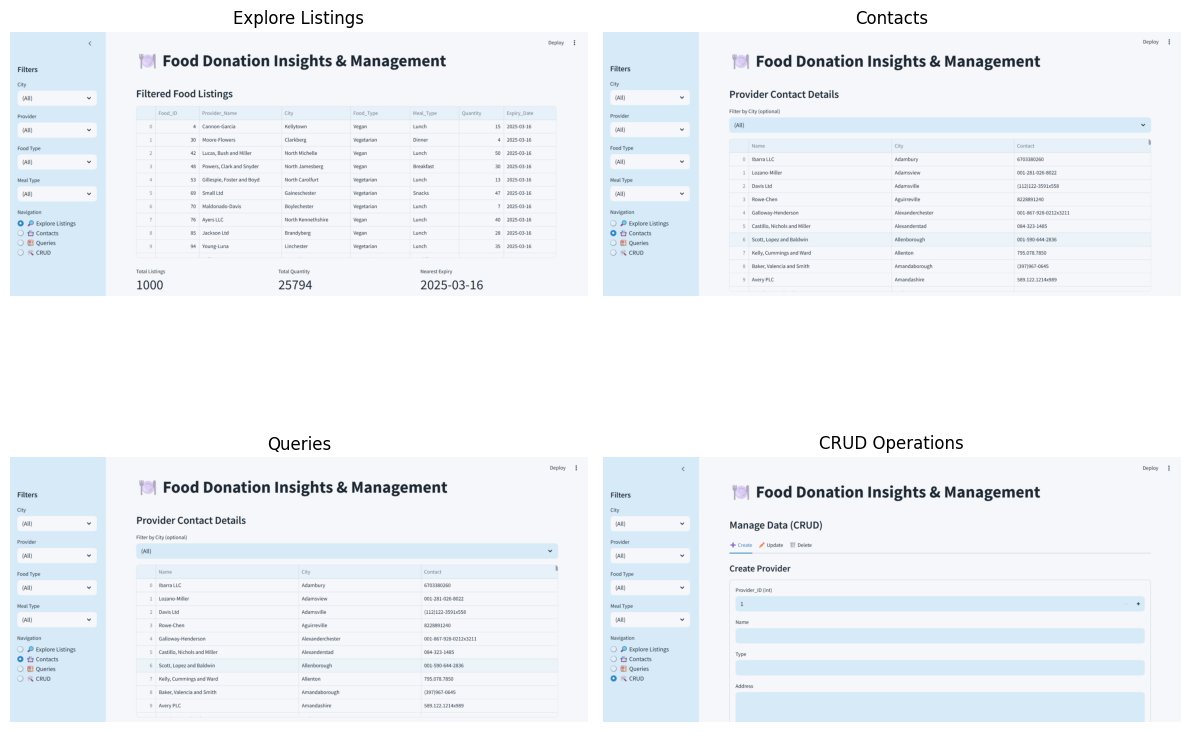

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load screenshots
img1 = mpimg.imread("images/explore.png")
img2 = mpimg.imread("images/contacts.png")
img3 = mpimg.imread("images/queries.png")
img4 = mpimg.imread("images/crud.png")

# Plot in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].imshow(img1); axes[0,0].set_title("Explore Listings"); axes[0,0].axis("off")
axes[0,1].imshow(img2); axes[0,1].set_title("Contacts"); axes[0,1].axis("off")
axes[1,0].imshow(img3); axes[1,0].set_title("Queries"); axes[1,0].axis("off")
axes[1,1].imshow(img4); axes[1,1].set_title("CRUD Operations"); axes[1,1].axis("off")

plt.tight_layout()
plt.show()

### Summary

The deployed Streamlit app:

* Provides a user-friendly interface for monitoring food donation activities.
* Supports **real-time filtering, query execution, and CRUD operations**.
* Enhances **decision-making and communication** between providers and receivers.


# **Conclusion**

The Food Waste Management project successfully demonstrates how data-driven solutions can address critical issues of food wastage and hunger. By designing and implementing a robust SQL database, we were able to organize and analyze large amounts of data related to food providers, receivers, listings, and claims. Through 15 structured SQL queries, meaningful insights were generated, such as identifying top contributors, high-demand locations, and patterns in food availability and distribution.

Building on these insights, we developed an interactive Streamlit application that provides a user-friendly interface to:

* Explore and filter food listings by city, provider, and meal type.

* Access direct contact details of providers and receivers for seamless coordination.

* Perform CRUD operations to keep the database updated.

* Visualize real-time outputs of the SQL queries for actionable decision-making.

Overall, this project not only highlights the potential of combining **SQL, Python, and Streamlit** for efficient data management but also provides a scalable solution for improving food distribution networks. By bridging the gap between food donors and receivers, the system enhances transparency, reduces wastage, and contributes toward building a more sustainable and socially responsible ecosystem.